----------------------------------
Estudo dos métodos

In [1]:
# Importando bibliotecas relevantes para o projeto
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations, combinations_with_replacement
from tqdm import tqdm
import math

In [2]:
# Textos de entrada para teste de similaridade
texto1 = "Botafogo campeão em 2023"
texto2 = "Botafogo não é campeão em 2023"

In [3]:
# Vetorizando os textos em tokens unigramas e bigramas (conjuntos de 1 ou 2 palavras subsequentes)
# No método abaixo utilizo o analyzer='word' para ignorar artigos e palavras de uma letra apenas. 
# Colocamos o range de ngramas de 1 a 2 para criar unigramas (1 palavara) e bigramas (2 palavras)
modelo = CountVectorizer(analyzer='word', ngram_range=(1,2)) 
tokens = modelo.fit([texto1,texto2])

dfTokens = pd.DataFrame(tokens.vocabulary_.items(), columns=['Token','Id']).set_index('Id').sort_index()

#Matriz dos textos 1 e 2 com a quantiade que cada token aparece nelas
#Cada token é uma coluna. Por exemplo, a palavra botafogo, id 1, aparece em ambos os textos. 
#Já o bigrama 'botafogo campeão' aparece somente no texto 2. (primeira linha 0 e segunda linha 1)
MatrixTextos = modelo.fit_transform([texto1,texto2]).toarray()

print("Texto 1: {}".format(texto1))
print("Texto 2: {}".format(texto2))
print("Tokens obtidos por nGramas")
dfTokens.join(pd.DataFrame(MatrixTextos).transpose().rename(columns={0:'Texto1',1:'Texto2'}))

Texto 1: Botafogo campeão em 2023
Texto 2: Botafogo não é campeão em 2023
Tokens obtidos por nGramas


,Token,Texto1,Texto2
Id,,,
0,2023,1,1
1,botafogo,1,1
2,botafogo campeão,1,0
3,botafogo não,0,1
4,campeão,1,1
5,campeão em,1,1
6,em,1,1
7,em 2023,1,1
8,não,0,1


[[1 1 1 0 1 1 1 1 0 0]
 [1 1 0 1 1 1 1 1 1 1]]
0.7559289460184544


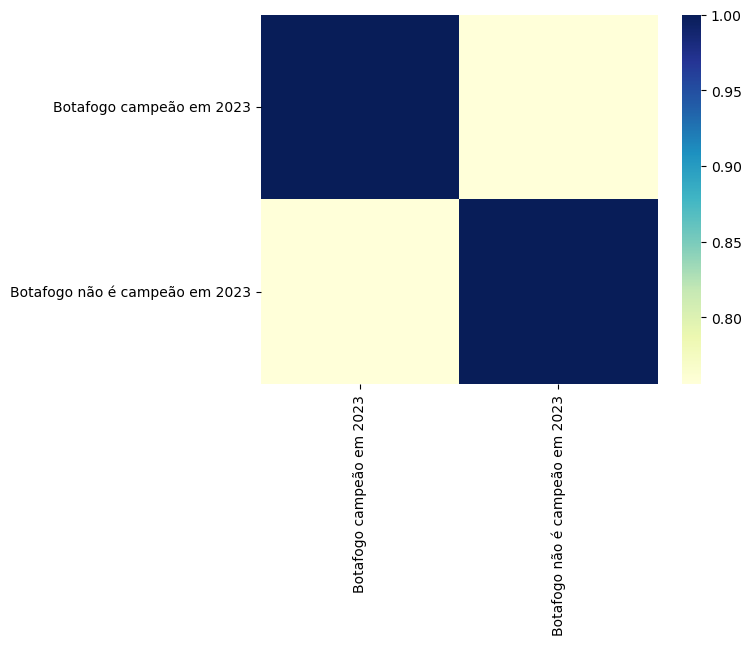

In [4]:
#Método do Cosseno
df = pd.DataFrame(cosine_similarity(MatrixTextos))
df.columns = [texto1,texto2]
df.index = [texto1,texto2]
sns.heatmap(df, cmap="YlGnBu")
print(MatrixTextos)
print(cosine_similarity(MatrixTextos)[0,1])

In [5]:
#Método de Jacard
#Calculando a inteseção entre os vetores dos 2 textos
intersecoes = np.amin(MatrixTextos, axis = 0)
print("Matriz de interseções")
print(intersecoes)
print()

#Calculando o total de interseções pela soma dos valores.
somaIntersecoes = np.sum(intersecoes)
print("Total de interseções: {}".format(somaIntersecoes))

#Calculando o total de tokens do texto base para servir de denominador
somaTokens = np.sum(MatrixTextos[0])
print("Total de tokens: {}".format(somaTokens))

#Calculando o total de interseções sobre o total de tokens do texto base para obter uma porcentagem de similariedade
similaridade = somaIntersecoes/somaTokens
print("Similaridade: {}%".format((similaridade*100).round(1)))

Matriz de interseções
[1 1 0 0 1 1 1 1 0 0]

Total de interseções: 6
Total de tokens: 7
Similaridade: 85.7%


----------------------------------
Versões finais encapsuladas em funções

In [6]:
#Função pelo método do cosseno
def analisarSimilaridadeCosseno(texto1, texto2):
    modelo = CountVectorizer(analyzer='word', ngram_range=(1,2))
    MatrixTextos = modelo.fit_transform([texto2,texto1]).toarray()
    
    similaridade = cosine_similarity(MatrixTextos)

    return similaridade[0,1]

In [7]:
#Função pelo método de Jacard (conjuntos)
def analisarSimilaridadeJacard(texto1, texto2):
    modelo = CountVectorizer(analyzer='word', ngram_range=(1,2))
    MatrixTextos = modelo.fit_transform([texto2,texto1]).toarray()
    
    intersecoes = np.amin(MatrixTextos, axis = 0)
    somaIntersecoes = np.sum(intersecoes)
    somaTokens = MatrixTextos.shape[1]
    similaridade = somaIntersecoes/somaTokens

    return similaridade

------------
Exemplo de uso com uma entrada simples

In [8]:
#Exemplo de uso com ambas as metodologias
A = "Shampoo 300ml jhonson para bebês"
B = "Shampoo 500ml para bebês"

similaridadeJacard = analisarSimilaridadeJacard(A,B)
similaridadeCosseno = analisarSimilaridadeCosseno(A,B)

print("Similaridade Jacard: {}".format(similaridadeJacard))
print("Similaridade Cosseno: {}".format(similaridadeCosseno))

Similaridade Jacard: 0.3333333333333333
Similaridade Cosseno: 0.5039526306789696


-----------------------------
Exemplo utilizando o dataframe fornecido no case

In [9]:
#Importando o csv com o dataframe e tratando os dados
produtos = pd.read_csv('DataSets/items_titles_test.csv', skipinitialspace = True)
produtos.ITE_ITEM_TITLE = produtos.ITE_ITEM_TITLE.replace(r'\s+', ' ', regex=True) #Removendo espaços duplos
produtos.ITE_ITEM_TITLE = produtos.ITE_ITEM_TITLE.str.strip() #Removendo espaços iniciais e finais desnecessários
produtos.ITE_ITEM_TITLE = produtos.ITE_ITEM_TITLE.str.title() #Ajustando maíusculas
produtos.sort_values(by='ITE_ITEM_TITLE', ascending=True)


,ITE_ITEM_TITLE
8845,(Kit) Tênis Polo Joker Cano Alto Botinha + Car...
4049,(Usada) Cristófoli Tênis Estampado Feminino Ta...
220,*Mega Promoção* Santinelli Tênis Ultraconforto...
5743,*Tênis Molekinha Camurça Original 2701105
9811,- Tênis Juliente Do 34 Ao 40
...,...
9476,Zapatillasde Tenis Para Hombre Jersey Sector 2...
688,Zapatos De Patinaje Sobre Ruedas Com Luz Led
6894,Zapatos De Seguridad Con Punta De Acero Para H...
2990,Zapatos Para Correr Ligeros Air Malha Para Hombre


In [10]:
#Função iterativa para calcular a similaridade decada combinação de itens, par a par (combinação simples)
def CalcularSimilaridadesDataframe(main_df):
    listaProdutos = main_df.copy()
    matrixSimilaridades = []
    combinacoes = combinations(listaProdutos.ITE_ITEM_TITLE,2) #Cria todas combinações possíveis, sem repetição
    qtdCombinacoes = (math.factorial(len(listaProdutos)))/(math.factorial(len(listaProdutos)-2))/2 #Calcula a quantiade total de iterações necessárias, somente para previsão de tempo de execução.

    pbar = tqdm(total = qtdCombinacoes)
    for produto in combinacoes:
        resultado = [produto[0],produto[1],analisarSimilaridadeCosseno(produto[0], produto[1])]
        matrixSimilaridades.append(resultado)
        pbar.update(1)

    matrixSimilaridades = pd.DataFrame(matrixSimilaridades)
    return matrixSimilaridades
    del(pbar)


In [11]:
#Chamando a função com o df tratado 
#Truquei o dataframe para 500 itens a fim de estudos e testes.Removendo essa parte o código faz o algoritmo para todo o dataset. Multithread seria ideal.
ResultadoSimilaridade = CalcularSimilaridadesDataframe(produtos.head(500)) 
ResultadoSimilaridade = ResultadoSimilaridade.rename(columns={0:"ITE_ITEM_TITLE",1:"ITE_ITEM_TITLE",2:"Score Similitud (0,1)"})
ResultadoSimilaridade = ResultadoSimilaridade.sort_values(by=ResultadoSimilaridade.columns[2], ascending=False)
ResultadoSimilaridade.head(20) #Top 20 similaridades


100%|██████████| 124750/124750.0 [00:30<00:00, 4081.35it/s]


,ITE_ITEM_TITLE,ITE_ITEM_TITLE,"Score Similitud (0,1)"
16693,Tênis Usthemp Spice TemáTico - Raposinhas,Tênis Usthemp Spice TemáTico - Labrador Choco...,0.752618
16692,Tênis Usthemp Spice TemáTico - Raposinhas,Tênis Usthemp Amy TemáTico - Raposinhas,0.727273
92076,Sapato Slip On Feminino,Superstar Slip On (Feminino),0.714286
65161,Tênis Usthemp Volare TemáTico - Love Is Love,Tênis Usthemp Volare TemáTico - Touro,0.658145
76875,Tênis Kolosh Feminino Hades White C1285,Tênis Kolosh Feminino Hades Preto - C2382,0.636364
4013,Tenis Infantil Feminino Menina Criança Moça,Tenis Infantil Feminino Menina Escolar D Incrível,0.636364
75848,Tênis Feminino Slip On Veroffato 6011002,Tênis Feminino Slip On Actvitta - 4815100,0.636364
1317,Tênis Usthemp Slip-On TemáTico - Labrador 2,Tênis Usthemp Spice TemáTico - Labrador Choco...,0.615385
37479,Sapatilha Ciclismo Bike Speed Absolute Nero Ro...,Sapatilha Ciclismo Bike Absolute Nero Speed C/...,0.600000
10372,Tenis Feminino Academia Caminhada Crossfit Cor...,Kit 2 Tenis Feminino Academia Original Corrida...,0.585369
